In [3]:
# Basic libs and ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# for Colab file download (optional)
from google.colab import files


In [4]:
data = pd.read_csv("/content/Crop_recommendation.csv")
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.info()
print("\nNumeric summary:\n", data.describe().T)
print("\nLabel counts:\n", data['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Numeric summary:
               count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693

In [6]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# If any missing values appear, you can drop or fill them:
# data = data.dropna()  # or use fillna() as appropriate


Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


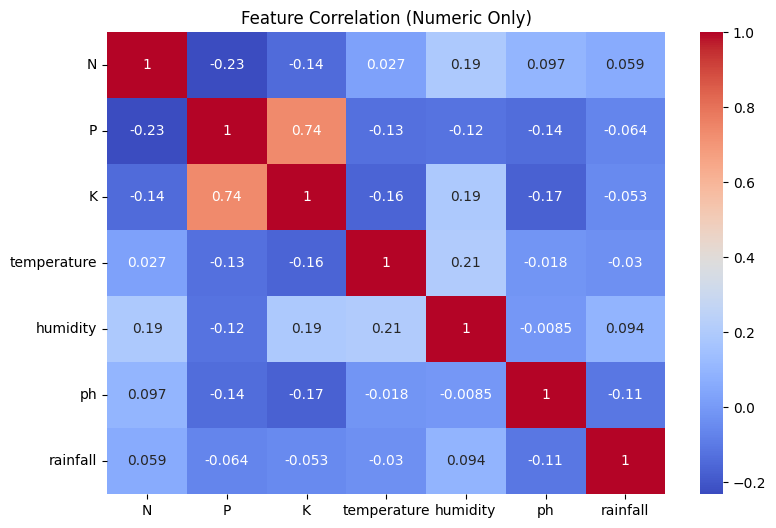

In [8]:
plt.figure(figsize=(9,6))
sns.heatmap(data.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Only)")
plt.show()


In [11]:
X = data.drop('label', axis=1)
y = data['label']

# Encode labels to integers for sklearn
le = LabelEncoder()
y_enc = le.fit_transform(y)  # keep encoder to convert back later

print("Example mapping (class -> encoded):")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Example mapping (class -> encoded):
{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
print("Train/test sizes:", X_train.shape, X_test.shape)


Train/test sizes: (1760, 7) (440, 7)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Use scaled or unscaled depending on previous step:
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9955

Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      

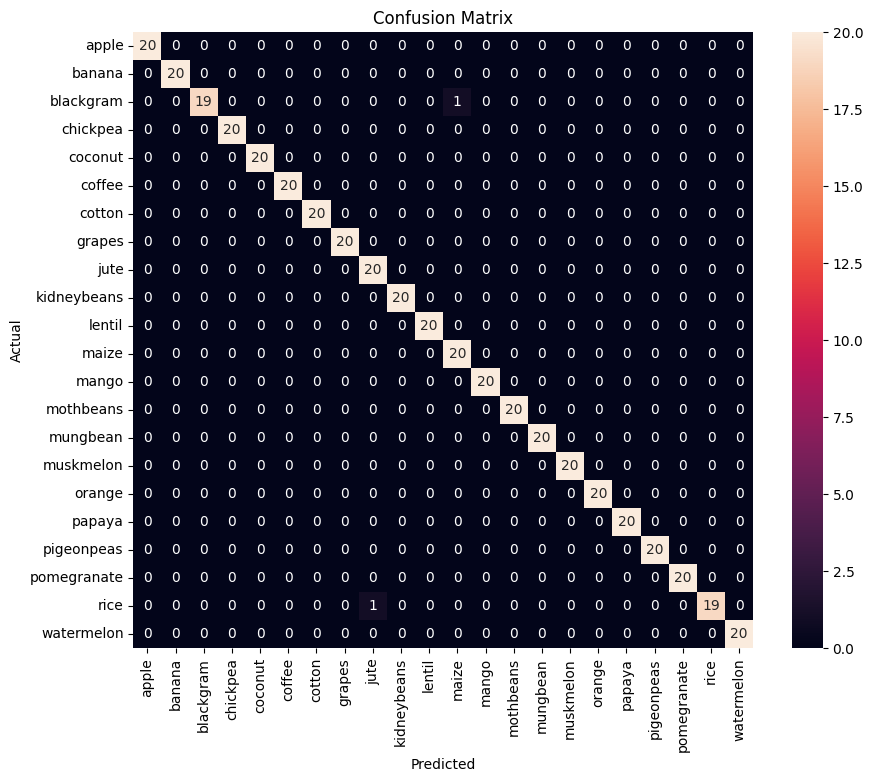

In [15]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
joblib.dump(model, "crop_model_rf.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le, "labelencoder.joblib")

# Optional: download to local machine
files.download("crop_model_rf.joblib")       # click to download
files.download("scaler.joblib")
files.download("labelencoder.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import joblib
from google.colab import files

joblib.dump(model, "crop_model_rf.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le, "labelencoder.joblib")

# Download to your computer
files.download("crop_model_rf.joblib")
files.download("scaler.joblib")
files.download("labelencoder.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Example input order: [N, P, K, temperature, humidity, ph, rainfall]
sample = np.array([[90, 42, 43, 20.8, 82.0, 6.5, 202.9]])  # replace these with real values

# scale using the saved scaler
sample_scaled = scaler.transform(sample)
pred_enc = model.predict(sample_scaled)[0]
pred_label = le.inverse_transform([pred_enc])[0]
print("Recommended crop:", pred_label)


Recommended crop: rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


✅ Model Evaluation Metrics

Accuracy: 99.55 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      oran

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


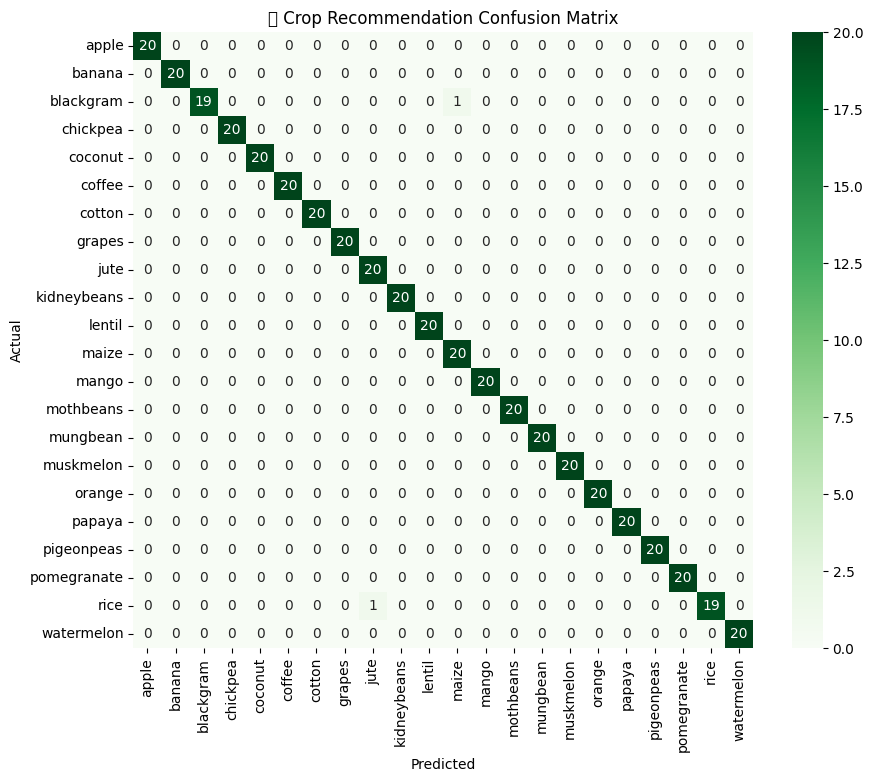

In [22]:
# 🌾 Crop Recommendation System - Model Evaluation (One Cell)

# 1️⃣ Imports
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2️⃣ Load saved model, scaler, and label encoder
model = joblib.load("crop_model_rf.joblib")
scaler = joblib.load("scaler.joblib")
le = joblib.load("labelencoder.joblib")

# 3️⃣ Load dataset
data = pd.read_csv("/content/Crop_recommendation.csv")  # adjust path if needed
X = data.drop('label', axis=1)
y = data['label']

# Encode labels using the same encoder
y_encoded = le.transform(y)

# 4️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5️⃣ Scale test data
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Predict
y_pred = model.predict(X_test_scaled)

# 7️⃣ Evaluation metrics
print("✅ Model Evaluation Metrics\n")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)} %\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 8️⃣ Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🌾 Crop Recommendation Confusion Matrix")
plt.show()
